# IMPORTS

In [9]:
# Importing Libraries
%matplotlib inline

from functions import *

from matplotlib import ticker

from sklearn import manifold, datasets
import numpy as np, pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis
            
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler

from sklearn.feature_selection import mutual_info_regression, f_regression

# DATA PREPARATION

In [12]:
#train_set_pre = "C:/Users/vince/Desktop/DM2/data/RavdessAudioOnlyFeatures_TRAIN_pre.csv"
#train_set = "C:/Users/vince/Desktop/DM2/data/RavdessAudioOnlyFeatures_TRAIN.csv"
train_set_pre = "DATA\ravdess_features_dm2\RavdessAudioOnlyFeatures_TRAIN_pre.csv"
train_set = "RavdessAudioOnlyFeatures_TRAIN.csv"

#df= pd.read_csv(train_set_pre)
df_not_pre = pd.read_csv(train_set)

df.head()

NameError: ignored

In [ ]:
df.dtypes[df.dtypes != 'int64'][df.dtypes != 'float64']

modality               object
vocal_channel          object
emotion                object
emotional_intensity    object
statement              object
repetition             object
sex                    object
filename               object
dtype: object

In [ ]:
#defining the maps to convert the word variables in numerical ones

vocal_map = {"speech": 0, "song": 1}
emotional_int_map = {"normal": 0, "strong" :1}
repetition_map = {"1st": 0, "2nd" :1}
sex_map = {"F": 0, "M" :1}
statement_map = {"Dogs are sitting by the door" :1, "Kids are talking by the door":0}
emotion_map = {'fearful':5, 'angry':4, 'happy':2, 'surprised':7, 'neutral':0, 'calm':1, 'sad':3, 'disgust':6}

#replacing the maps and creating the corr graph

df.replace({"vocal_channel": vocal_map,
            "emotional_intensity": emotional_int_map,
            "repetition": repetition_map,
            "sex": sex_map,
            "statement": statement_map,
            "emotion" : emotion_map}, inplace = True)

In [ ]:
df.dtypes[df.dtypes != 'int64'][df.dtypes != 'float64']

modality    object
filename    object
dtype: object

In [ ]:
df.drop(["modality", "filename"], axis = 1, inplace = True )

df.dtypes[df.dtypes != 'int64'][df.dtypes != 'float64']

Series([], dtype: object)

In [ ]:
unique = find_unique(df)
df.drop(unique, axis=1, inplace = True)
print(len(unique))

# # Using set() and difference() to find the difference between two lists
# diff_list = set(unique_train).difference(set(unique_test))

# # Printing the result
# print("The elements that are different in list1 and list2 are:", list(diff_list))


0


In [ ]:
# scaler = MinMaxScaler()
# df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

# DATA PARTITIONING

In [ ]:
X = df.drop("vocal_channel", axis = 1)
y = df["vocal_channel"]

# X = df.loc[:, df.columns != "vocal_channel"].values
# y = df.loc[:,  "vocal_channel"]

print(X.shape, y.shape)

(1828, 157) (1828,)


In [ ]:
# Data Partitioning
from sklearn.model_selection import train_test_split, cross_val_score 

from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=100, stratify=y)

# CLASSIFICATION

### DTC setup

In [ ]:
dtc = DecisionTreeClassifier()

In [ ]:
%%time
dtc.fit(X_train, y_train)

In [ ]:
plt.figure(figsize=(20, 4), dpi=300)
plot_tree(dtc, feature_names=df.columns, filled=True)
plt.show()

In [ ]:
dtc.score(X_test, y_test)

In [ ]:
from sklearn.metrics import (
    accuracy_score,
    f1_score,
    classification_report,
    confusion_matrix,
    roc_auc_score,
)
from scikitplot.metrics import plot_roc
from scikitplot.metrics import plot_precision_recall
from scikitplot.metrics import plot_cumulative_gain, plot_lift_curve

# plot_cumulative_gain and plot_lift_curve only work in a binary classification case

In [ ]:
y_train_pred = dtc.predict(X_train)
y_test_pred = dtc.predict(X_test)

In [ ]:
print("accuracy train is :", accuracy_score(y_train, y_train_pred,normalize = False))
print("accuracy test is :", accuracy_score(y_test, y_test_pred,normalize = False))

print("\n")

print("f1 train is :", f1_score(y_train, y_train_pred, average="macro"))
print("f1 test is:",f1_score(y_test, y_test_pred, average="macro"))

In [ ]:
y_train_pred, y_train

In [ ]:
print(classification_report(y_test, y_test_pred))

In [ ]:
cf = confusion_matrix(y_test, y_test_pred)
sns.heatmap(cf, annot=True, cmap="Greens")
plt.xlabel("True")
plt.ylabel("Predicted")
plt.show()

In [ ]:
y_test_pred_proba = dtc.predict_proba(X_test)

In [ ]:
plot_precision_recall(y_test, y_test_pred_proba)
plt.show()

### DTC cross-validation

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
max_depth = 2
dtc = DecisionTreeClassifier(max_depth=max_depth)
scores = cross_val_score(dtc, X_train, y_train, cv=5)
cross_val_score(dtc, X_train, y_train, cv=5)

In [ ]:
print('Accuracy: %0.4f (+/- %0.2f)' % (scores.mean(), scores.std()))

In [ ]:
max_depths = [2, 4, 6, 8, 10, 12, 16, None]
scores = list()
for max_depth in max_depths:
    dt = DecisionTreeClassifier(max_depth=max_depth)
    scores.append(cross_val_score(dt, X_train, y_train, cv=5).mean())
plt.plot(scores)
plt.xticks(range(len(max_depths)), max_depths)
plt.xlabel("max_depths")
plt.ylabel("accuracy")
plt.show()

In [ ]:
min_samples_splits = [0.002, 0.02 , 0.2 , 2]
scores = list()
for min_samples_split in min_samples_splits:
    dt = DecisionTreeClassifier(min_samples_split=min_samples_split)
    scores.append(cross_val_score(dt, X_train, y_train, cv=5).mean())
plt.plot(scores)
plt.xticks(range(len(min_samples_splits)), min_samples_splits)
plt.xlabel("min_samples_split")
plt.ylabel("accuracy")
plt.show()

### DTC tuned

In [ ]:
dtc_hp= DecisionTreeClassifier(max_depth=6, min_samples_split=0.02, random_state=42)

dtc_hp.fit(X_train,y_train)

In [ ]:
y_test_pred_hp = dtc_hp.predict(X_test)

In [ ]:
print(dtc_hp.score(X_test, y_test))

print(classification_report(y_test, y_test_pred_hp))

# DIM RED

In [ ]:
dtc = DecisionTreeClassifier()
dtc_hp= DecisionTreeClassifier(max_depth=6, min_samples_split=0.02, random_state=42)

### UNIVARIATE FEATURE SELECTION - considering categorical-continous 

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_regression
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [ ]:
def get_categorical_continuous_features(df):
    categorical_features = []
    continuous_features = []
    
    for col in df.columns:
        if len(df[col].unique()) <= 18 and col != "vocal_channel":
            categorical_features.append(col)
        else:
            continuous_features.append(col)
            
    print("categorical are: {}, continuous are{}".format(categorical_features, continuous_features))
    return categorical_features, continuous_features

    
categorical_features, continuous_features = get_categorical_continuous_features(df)


In [ ]:
numeric_transformer = make_pipeline(SelectKBest(score_func=chi2, k="all"))

categorical_transformer = make_pipeline(SelectKBest(score_func=f_regression, k = "all"))

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, continuous_features),
        
        ("cat", categorical_transformer, categorical_features)
    ],
    remainder = "passthrough"
)

In [ ]:
clf = make_pipeline(preprocessor)

clf.transform(X)

### UNIVARIATE FEATURE SELECTION - wrong score function application

In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif
from functools import partial

selector = SelectKBest(f_classif, k=100)
selector.fit_transform(X_train, y_train)
scores = -np.log10(selector.pvalues_)
scores /= scores.max()

In [ ]:
X_indices = np.arange(X.shape[-1])
plt.figure(1)
plt.clf()
plt.bar(X_indices - 0.05, scores, width=0.2)
plt.title("Feature univariate score")
plt.xlabel("Feature number")
plt.ylabel(r"Univariate score ($-Log(p_{value})$)")
plt.show()

### UNIVARITE pipeline

In [ ]:
clf = make_pipeline(dtc_hp)
clf.fit(X_train, y_train)
print(
    "Classification accuracy without it: {:.3f}".format(
        clf.score(X_test, y_test)
    )
)
y_train_pred = clf.predict(X_train)
print(classification_report(y_test, y_test_pred))

In [ ]:
clf = make_pipeline(SelectKBest(f_classif, k=100), dtc_hp)
clf.fit(X_train, y_train)
print(
    "Classification accuracy with it: {:.3f}".format(
        clf.score(X_test, y_test)
    )
)
y_train_pred = clf.predict(X_train)
print(classification_report(y_test, y_test_pred))

### VARIANCE TRESHOLD

In [ ]:
from sklearn.feature_selection import VarianceThreshold

selector = VarianceThreshold(threshold=(.983 * (1 - .983)))
X_train_sel = selector.fit_transform(X_train)

In [ ]:
print("before selector {}, and after apllying it {}".format( X_train.shape, X_train_sel.shape))

### VARIANCE TRESHOLD pipeline

In [ ]:
clf = make_pipeline(dtc_hp)
clf.fit(X_train, y_train)
print(
    "Classification accuracy without it: {:.3f}".format(
        clf.score(X_test, y_test)
    )
)
y_train_pred = clf.predict(X_train)
print(classification_report(y_test, y_test_pred))

In [ ]:
clf = make_pipeline(VarianceThreshold(threshold=(.983 * (1 - .983))),dtc_hp)
clf.fit(X_train, y_train)
print(
    "Classification accuracy with it: {:.3f}".format(
        clf.score(X_test, y_test)
    )
)
y_train_pred = clf.predict(X_train)
print(classification_report(y_test, y_test_pred))

# OUTLIER DETECTION

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_regression
from sklearn.feature_selection import mutual_info_regression, f_regression

In [ ]:
df_cont = df.drop(CAT2, axis=1)

scaler = MinMaxScaler()
df_cont = pd.DataFrame(scaler.fit_transform(df_cont), columns=df_cont.columns)

target = df["vocal_channel"]

In [ ]:
def featureSelect_dataframe(X, y, criteria, k):

    # initialize our function/method
    reg = SelectKBest(criteria, k=k).fit(X,y)
    
    # transform after creating the reg (so we can use getsupport)
    X_transformed = reg.transform(X)

    # filter down X based on kept columns
    X = X[[val for i,val in enumerate(X.columns) if reg.get_support()[i]]]

    # return that dataframe
    return X

New_X = featureSelect_dataframe(df_cont, target, mutual_info_regression, 2)

New_X

,length_w4,stft_q01_w4
0,0.107835,0.000000
1,0.117630,0.570998
2,0.098017,0.000000
3,0.068609,0.474429
4,0.176469,0.385338
...,...,...
1823,0.166650,0.000000
1824,0.205877,0.000000
1825,0.176469,0.000000
1826,0.274510,0.000000


In [ ]:
x1, x2 = New_X.iloc[:,0], New_X.iloc[:,1]

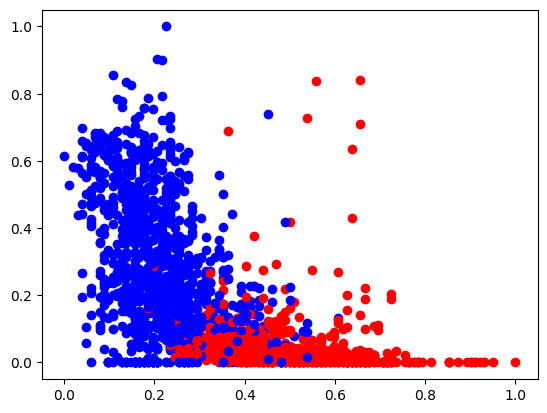

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

for idx, i in enumerate(target):
  if i==0.0: 
    color='blue'
  else: 
    color='red'
  plt.scatter(x1[idx], x2[idx], c=color)

### ABOD

In [ ]:
from pyod.models.abod import ABOD

In [ ]:
clf = ABOD(method = "fast")
clf.fit(X)

ABOD(contamination=0.1, method='fast', n_neighbors=5)

In [ ]:
outliers = clf.predict(X)
np.unique(outliers, return_counts=True)

(array([0, 1]), array([1617,  211], dtype=int64))

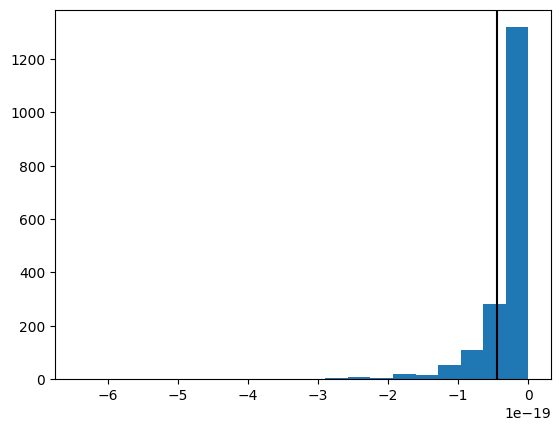

In [ ]:
plt.hist(clf.decision_scores_, bins=20)
plt.axvline(np.min(clf.decision_scores_[np.where(outliers==1)]), c='k')
plt.show()

In [ ]:
from pyod.models.abod import ABOD

abod_model = ABOD(contamination=0.1, method= "fast", n_neighbors=10)
abod_model.fit(New_X)

pred = abod_model.predict(New_X)

error = (pred != target).sum()
print (f'Error % = {(error/len(pred))*100}')

Error % = 45.459518599562365


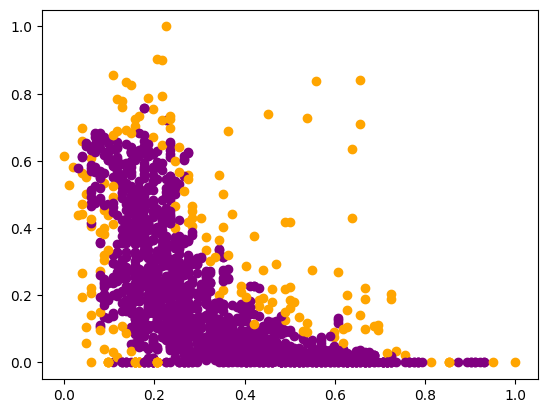

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

for idx, i in enumerate(pred):
  if i==0.0: 
    color='purple'
  else: 
    color='orange'
  plt.scatter(x1[idx], x2[idx], c=color)

### LODA

In [ ]:
from pyod.models.loda import LODA

In [ ]:
clf = LODA()
clf.fit(X)

LODA(contamination=0.1, n_bins=10, n_random_cuts=100)

In [ ]:
outliers = clf.predict(X)
np.unique(outliers, return_counts=True)

(array([0, 1]), array([1645,  183], dtype=int64))

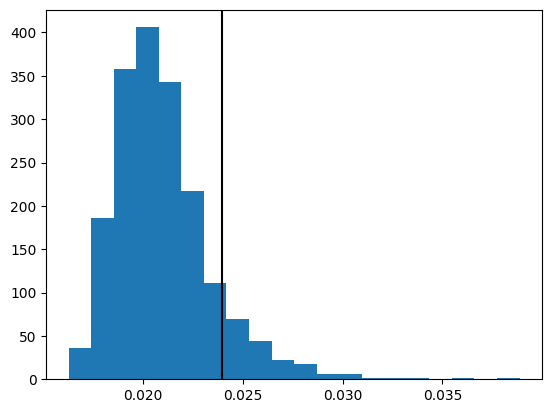

In [ ]:
plt.hist(clf.decision_scores_, bins=20)
plt.axvline(np.min(clf.decision_scores_[np.where(outliers==1)]), c='k')
plt.show()

In [ ]:
loda_model = LODA()
loda_model.fit(New_X)

pred = loda_model.predict(New_X)

error = (pred != target).sum()
print (f'Error % = {(error/len(pred))*100}')

Error % = 41.95842450765864


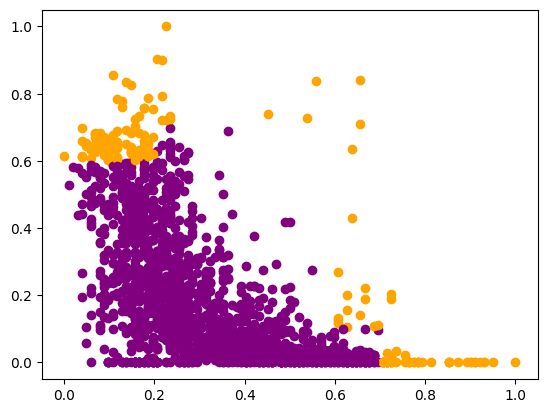

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

for idx, i in enumerate(pred):
  if i==0.0: 
    color='purple'
  else: 
    color='orange'
  plt.scatter(x1[idx], x2[idx], c=color)